## Sintaxe Espacial: Métricas Configuracionais do Espaço Urbano

**AUTORIA:** [REDE MOB](https://www.redemob.com.br/), com base em [aplicação para QGIS](https://github.com/gkdalcin/GAUS) desenvolvida pelo [Grupo de Pesquisa Sistemas Urbanos](https://www.ufrgs.br/sistemas-urbanos/).

Este script foi desenvolvido para calcular um conjunto de métricas derivadas da Sintaxe Espacial, uma metodologia amplamente utilizada para analisar a forma como o espaço urbano é organizado e como essa organização influencia o movimento das pessoas. A Sintaxe Espacial parte da ideia de que o modo como ruas, avenidas e caminhos estão conectados entre si afeta diretamente a acessibilidade e o fluxo dentro da cidade.

As métricas produzidas por este script — como conectividade, integração, escolha, profundidade e outras — ajudam a revelar quais áreas da cidade são mais centrais, acessíveis ou isoladas dentro da rede viária. Essas análises são fundamentais para o planejamento urbano e de transportes, pois permitem identificar padrões espaciais que influenciam a mobilidade, a vitalidade urbana e até mesmo a segurança.

As métricas específicas que são calculadas estão detalhadas [no repositório do código original](https://github.com/gkdalcin/GAUS). Elas são calculadas a partir da rede viária do município, extraída do OpenStreetMap a partir do município definido pelo usuário. Opcionalmente, o usuário pode fornecer dados que dizem respeito aos pesos de cada nó, para as métricas que assim permitem, como a centralidade de Freeman-Krafta, por exemplo.

**PANORAMA:**
- Obtém rede viária do OpenStreetMap
- Opcionalmente, consolida a rede viária:

        Em mapas urbanos digitais, é comum que uma única interseção real — como um cruzamento ou uma rotatória — seja representada por vários pontos muito próximos entre si. Isso ocorre porque cada trecho de rua que se conecta em um local recebe um ponto (ou nó) próprio. Em cruzamentos com avenidas de pistas separadas, por exemplo, cada sentido da via é desenhado como uma linha diferente, e quando essas linhas se cruzam com outras, o modelo acaba criando até quatro pontos distintos para representar o que, na realidade, é apenas um cruzamento.

        O mesmo acontece em rotatórias, onde cada rua entra e sai em pontos separados ao redor do círculo. Embora todos esses pontos façam parte de uma única interseção, o sistema os trata como múltiplas interseções por estarem ligados a diferentes trechos de rua.

        Para representar isso de forma mais fiel, pode-se considerar que todos os pontos que estiverem a uma distância de até, por exemplo, 15 metros uns dos outros, pertencem à mesma interseção. Esse limite de distância pode ser ajustado de acordo com os padrões de projeto viário da região analisada. Também é importante que essa análise seja feita em uma base de dados com coordenadas projetadas, que permitam trabalhar com unidades reais de medida, como metros.

        Essa concolidação, aqui, ainda opta por excluir os chamados becos sem saída, pois não representam interseções relevantes para fins de análise de conectividade urbana.

- Gera [Polígonos de Thiessen](https://support.esri.com/pt-br/gis-dictionary/thiessen-polygon) ao redor de cada um dos nós da rede
- Sobrepões esses polígonos com tabelas geográficas contendo atributos do espaço urbano (população, quantidade de empresas, áreas construída etc.) para imputar esses atributos aos nós com o uso de [interpolações espaciais por áreas](https://www.researchgate.net/profile/Nina_Lam/publication/239654534_Areal_Interpolation_A_Variant_of_the_Traditional_Spatial_Problem/links/02e7e52f13aa846a64000000/Areal-Interpolation-A-Variant-of-the-Traditional-Spatial-Problem.pdf) ou de [junções espaciais](https://geopandas.org/en/stable/gallery/spatial_joins.html).
- Análises globais e locais, a depender dos [raios de análise](https://github.com/gkdalcin/GAUS/wiki/How-the-Analysis-Radius-Works) definidos.
- Análises levam em conta impedâncias referentes às velocidades máximas de cada aresta, conforme obtidas via OpenStreetMap: caminhos tendem a passar por locais de maior velocidade pois lá há menos impedância.
    - [Impedância](https://github.com/gkdalcin/GAUS/wiki/Definition-of-Distances) é o valor que representa o “custo” de atravessar um trecho da rede, normalmente relacionado ao tempo de viagem ou à velocidade — quanto maior a impedância, mais demorado ou difícil é passar por ali.
    - Está previsto melhorar o script a fim de serem utilizadas as velocidades reais em condições de trânsito mais intenso.

**Importante**: Dependendo do tamanho da cidade e de sua rede viária, o tempo de processamento pode ser relativamente elevado, podendo chegar a algumas horas. Com efeito, **refatorações estão previstas para aumentar a eficiência**. Por ora, mos testes realizados durante a construção deste script, utilizando os municípios de Niterói, São Gonçalo e Itaboraí, no estado do Rio de Janeiro, o processamento variou entre cerca de **50 minutos**, para análises mais locais, e **6 horas**, para análises globais, em um computador com as seguintes especificações:
    
    Processador: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz 2.59 GHz
    RAM instalada: 16,0 GB (utilizável: 15,8 GB)
    Tipo de sistema: Sistema operacional de 64 bits, processador baseado em x64

*TODO: Pedir a júnia para ajustar isso e criar ou catar textos em português*


**MAIS INFORMAÇÕES:**
- [Layout da Plataforma]
- [Sumário dos Dados Disponíveis]
- *Lorem ipsum: Conteúdo do MOB de interesse, técnico ou de divulgação*

**LINKS DE INTERESSE:**
Detalhes teóricos para os mais curiosos podem ser encontrados em uma vasta literatura técnica e acadêmica, mas, de início, pode ser interessante começar pelas [notas de aula do professor Romulo Krafta](https://www.researchgate.net/profile/Romulo-Krafta/publication/265597665_NOTAS_DE_AULA_DE_MORFOLOGIA_URBANA/links/58cfdeb7458515b6ed8c457f/NOTAS-DE-AULA-DE-MORFOLOGIA-URBANA.pdf), as quais foram transformadas em livro.

- links para materiais técnicos e acadêmicos gerais, externos, de referência a respeito do conteúdo abordado


# Instruções

Este script requer:
1. O código do IBGE para o município
    - Caso se deseje fazer a análise de municípios vizinhos, fornecer uma lista com os códigos do IBGE destes municípios
  
2. O tipo de rede a ser requisitada do OpenStreetMap:
    - `drive`: todas as ruas públicas em que é possível dirigir, excluindo vias de serviço;
    - `drive_service`: todas as ruas em que é possível dirigir, incluindo vias de serviço, mas exclui alguns usos como estacionamento ou acesso de emergência;
    - `walk`: todas as ruas e caminhos que pedestres podem usar, incluindo vias de serviço — p. ex., estacionamentos — ou becos nos quais você pode andar, mesmo que sejam desconfortáveis (nesse tipo de rede, ignora-se o sentido das vias, dado que pedestres podem se mover em todas as direções);
    - `bike`: todas as ruas e caminhos que ciclistas podem usar;
    - `all_public`: todas as vias e caminhos públicos atualmente em uso; e
    - `all`: todas as vias públicas ou privadas atualmente em uso.

3. (opcional) Definir se a rede deve ser consolidada ou não:
    - `consolidar_rede = False` -> Não agrega nós próximos
    - `consolidar_rede = True` -> Agrega nós próximos
    - Se `consolidar_rede = True` usuário deve definir `tolerancia_consolidacao`, a qual deve receber um valor em metros e, todos os nós que estão a `tolerancia_consolidacao` metros um do outros serão consolidados em um único nó. Por padrão, utiliza `tolerancia_consolidacao = 15`, mas outros valores podem ser tentados. Note que valores excessivamente altos podem distorcer a análise e valores muito baixos podem fazer com que o procedimento não agregue nó algum.

4. Um dígito de 0 a 7, representando qual das [métricas de sintaxe espacial](https://github.com/gkdalcin/GAUS) se deseja calcular:
    - 0: `Acessibilidade`, # TODO: checar tradução
    - 1: `Intermediação`,
    - 2: `Freeman-Krafta`,
    - 3: `Oportunidade`,
    - 4: `Convergência`,
    - 5: `Polarização`,
    - 6: `Alcance`,
    - 7: `Conectividade`, # TODO: checar se é mesmo a equivalente a degree centrality
5. [Raios de análise](https://github.com/gkdalcin/GAUS/wiki/How-the-Analysis-Radius-Works) em metros. Por padrão, aplica o modelo ao longo de diferentes raios (500 m, 1000 m, 2500 m, 5000 m, and global), indo, portanto, desde a escala da vizinhança até a escala de toda a área urbana.

6. (Opcional) Uma tabela geográfica com os dados que serão atribuídos aos nós para ponderação, se desejado. Esses dados são então atribuídos aos nós segundo duas possibilidades:
    - A primeira possibilidade é utilizar uma tabela geográfica com polígonos, representando, por exemplo, [dados do cadastro imobilíario do IPTU](https://bhmap.pbh.gov.br/v2/mapa/idebhgeo#zoom=5&lat=7796792.33442&lon=610634.63528&baselayer=base&layers=cadastro_imobiliario), contendo os lotes do município e a área total construída em cada um deles. Assim, cada nó recebe um peso que é tanto maior quanto maior é a área construída à sua volta. Analogamente, qualquer outro atributo armazenado em polígonos pode ser utilizado — p. ex., população em setores censitários, quantidade de atividade comercial por bairro etc.
    - A segunda possibilidade envolve prover uma tabela geográfica com pontos, em que cada elemento da tabela tem uma coordenada geográfica associada — localização de empresas, por exemplo. Se isso for fornecido, cada nó da rede é associado ao ponto mais próximo e o peso corresponde à soma das quantidades
    - **TODO: melhorar essa explicação: tá meio confusa**

# Parâmetros Definidos Pelo Usuário

In [ ]:
# Forneça código do IBGE da cidade, ou lista de códigos
# se quiser cidades vizinhas. P. ex.:
# ibge_id = 3303302 -> Niterói
ibge_id = [3303302, 3304904, 3301900] # Niterói, São Gonçalo, Itaboraí

tipo_de_rede = 'drive'
consolidar_rede = True # Não agrega nós (interseções) muito próximos
tolerancia_consolidacao = 15 # Apenas faz diferença se consolidar_rede = True

metrica = [1, 2, 3, 4, 5] # Metrica de sintaxe espacial escolhida
impedancia = 'impedance' # Por enquanto não há alternativas para isso
raio_analise = [500, 1_000, 2_500, 5000, 0] # metros

# Todo: elaborar
tabelas_atributos = [
    '../database/1. Socioeconômicos/rais_by_cep_2023.parquet',
    '../database/1. Socioeconômicos/sociodemografia_2010.parquet',
    ]
attr_cols = [
    ('quantidade_vinculos_ativos', 'quantidade_estabelecimentos'),
    ('habitantes'),
    ]
    

# Backend

Processamento interno do código. A princípio, o usuário não precisa se preocupar com esta parte, mas aqueles com conhecimento mais avançado de programação podem fazer ajustes de acordo com as próprias necessidades específicas.

In [2]:
# Standard library imports
from collections import defaultdict
from pathlib import Path
from typing import List, Optional, Union

# Third-party library imports
import contextily as ctx
import geobr
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd
from libpysal.cg import voronoi_frames
from matplotlib_scalebar.scalebar import ScaleBar
from pandas.api.types import CategoricalDtype
from shapely.geometry import Point
from sklearn.preprocessing import MinMaxScaler
from tobler.area_weighted import area_interpolate
from tqdm import tqdm


Cannot find header.dxf (GDAL_DATA is not defined)


In [3]:
def get_study_area(ibge_id):
    if not isinstance(ibge_id, list):
        ibge_id = [ibge_id]

    return pd.concat([
        geobr.read_municipality(id_)
        for id_
        in ibge_id
        ]).reindex(columns=['geometry'])


place = get_study_area(ibge_id)

c:\Users\brand\anaconda3\envs\roda\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


In [4]:
crs = place.estimate_utm_crs(datum_name='SIRGAS 2000')
crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Redes viárias reais são representadas por [grafos direcionados](https://pt.wikipedia.org/wiki/Grafo_orientado), [não planares](https://pt.wikipedia.org/wiki/Grafo_planar), que permitem a existência de arestas paralelas (mais de uma ligação entre os mesmos pontos) e laços (conexões de um ponto consigo mesmo). Nesse tipo de estrutura, uma rua de mão única é representada por uma única linha com direção, ligando o ponto de origem (nó `u`) ao ponto de destino (nó `v`). Já uma rua de mão dupla é representada por duas linhas sobrepostas, com sentidos opostos: uma do nó `u` para o `v`, e outra do `v` para o `u`, indicando o fluxo possível nos dois sentidos.

Por serem grafos não planares, esses modelos conseguem representar corretamente situações do mundo real como viadutos, passagens subterrâneas e trevos rodoviários, onde as vias se cruzam em diferentes níveis. Assim, dois caminhos que se cruzam em um mapa bidimensional não são considerados uma interseção no modelo — a menos que exista, de fato, uma junção física entre eles no espaço tridimensional.

Contudo, o algoritmo do GAUS não lida bem com casos em que há mais de um caminho possível `u` -> `v`. Nesses casos, mantém-se a via com maior hierarquia, segundo a ordem de prioridades definida abaixo. Elementos listados primeiro tem maior prioridade frente aos que vem listados depois. Ainda, o algoritmo não consegue lidar de forma alguma com laços. Esses são, então, sempre removidos. 

In [93]:
hierarquias_viarias = [
    # Vias principais (prioridade de navegação)
    "motorway", "motorway_link",
    "trunk", "trunk_link",
    "primary", "primary_link",
    "secondary", "secondary_link",
    "tertiary", "tertiary_link",

    # Vias locais
    "residential", "living_street", "service", "unclassified",

    # Vias que não permitem modos motorizados
    "path", "footway", "bridleway", "cycleway", "pedestrian", "steps",
    
    # Estradas rurais e especiais
    "road", "track",

    # De acesso específico
    "corridor", "escape", "bus_guideway", "raceway",

    # Baixa prioidade de miscelânea
    "construction"
]


In [94]:
def get_network(
        place,
        hierarquias,
        network_type='drive',
        out_crs=31983,
        is_simplified=True,
        consolidate_intersections=False,
        intersection_consolidation_tolerance=15,
        ):
    graph = ox.graph_from_polygon(
        place.to_crs(4326).union_all().convex_hull,
        network_type=network_type,
        simplify=is_simplified,
        )

    if consolidate_intersections:
        graph = ox.consolidate_intersections(
            graph,
            rebuild_graph=True,
            tolerance=intersection_consolidation_tolerance,
            dead_ends=True,
            )

    graph = consolidate_edges(graph, hierarquias)

    return ox.project_graph(graph, to_crs=out_crs)


def consolidate_edges(G, hierarquias):
    invalid_bunch = _select_invalid_edges(G)
    # GAUS does not handle self-loops
    self_loop_bunch = list(nx.selfloop_edges(G, keys=True))
    ebunch = self_loop_bunch.append(invalid_bunch)

    if ebunch:
        G.remove_edges_from(ebunch)
        G.remove_nodes_from(
            list(nx.isolates(G))
            )

    return get_largest_component(
        _collapse_multiedges_by_highway(G, hierarquias)
        )


def get_largest_component(G):
    largest_wcc = max(nx.weakly_connected_components(G), key=len)
    
    largest_graph = G.__class__()
    largest_graph.add_nodes_from((n, G.nodes[n]) for n in largest_wcc)
    if largest_graph.is_multigraph():
        largest_graph.add_edges_from(
            (n, nbr, key, d)
            for n, nbrs in G.adj.items()
            if n in largest_wcc
            for nbr, keydict in nbrs.items()
            if nbr in largest_wcc
            for key, d in keydict.items()
        )
    else:
        largest_graph.add_edges_from(
            (n, nbr, d)
            for n, nbrs in G.adj.items()
            if n in largest_wcc
            for nbr, d in nbrs.items()
            if nbr in largest_wcc
        )
    largest_graph.graph.update(G.graph)

    return largest_graph


def _collapse_multiedges_by_highway(G, hierarquias):
    highway_cat = CategoricalDtype(
        categories=hierarquias, ordered=True,
        )
    edges = (
        ox
        .graph_to_gdfs(G, nodes=False)
        .explode('highway')
        .astype({'highway': highway_cat})
        .sort_values(by='highway')
        .reset_index()
        .drop_duplicates(subset=['u', 'v'])
        .set_index(['u', 'v', 'key'])
        )
    return ox.graph_from_gdfs(
        ox.graph_to_gdfs(G, edges=False),
        edges,
        graph_attrs=G.graph
        )


def _select_invalid_edges(G):
    """
    Removes edges of certain highway types that are
    not really part of day to day paths, such as trails.
    """
    h_types = [
        'tracks',
        'unclassified',
        'steps',
        'path',
        'corridor',
        'track',
        ]
    return [
        tuple(e)
        for *e, d
        in G.edges(data=True, keys=True)
        if np.isin(h_types, d.get('highway')).any() 
        ]


In [95]:
graph = get_network(
    place,
    hierarquias_viarias,
    network_type='drive',
    out_crs=crs,
    is_simplified=True,
    consolidate_intersections=False,
    intersection_consolidation_tolerance=15,
    )

In [96]:
graph = ox.add_edge_speeds(graph)

In [97]:
nodes, edges = ox.graph_to_gdfs(graph)

In [98]:
def impute_attributes_to_nodes(
    nodes: gpd.GeoDataFrame,
    gdf: gpd.GeoDataFrame,
    study_area: gpd.GeoDataFrame,
    attr_cols: List[str],
    out_crs: str | int = 31983
) -> gpd.GeoDataFrame:
    """
    Impute attributes from a GeoDataFrame to nodes in an OSMnx graph.

    Parameters:
    - nodes: GDF containing nodes of a OSMnx graph
    - gdf: GeoDataFrame with Point or Polygon geometries
    - study_area: GeoDataFrame defining the study area
    - attr_cols: List of attribute columns to impute (must be numeric)
    - use_area_interpolation: Use Tobler area interpolation (for polygons only)
    - out_crs: CRS to project geometries for spatial operations

    Returns:
    - nodes: GeoDataFrame with imputed attributes
    """
    # Validate input GeoDataFrame
    gdf, geom_types = validate_input_gdf(gdf, attr_cols)

    # Create Voronoi polygons
    node_polygons = create_voronoi_polygons(nodes, study_area, out_crs)

    # Handle different geometry types using a dispatch dictionary
    geometry_handlers = {
        frozenset({'Polygon', 'MultiPolygon'}): handle_polygons_with_area_interpolation,
        frozenset({'Point', 'MultiPoint'}): handle_points_with_spatial_join,
    }

    for geom_type_set, handler in geometry_handlers.items():
        if geom_types.issubset(geom_type_set):
            return handler(nodes, gdf, node_polygons, attr_cols, out_crs)

    raise ValueError("Tipo de geometria não suportado no GeoDataFrame.")


def validate_input_gdf(
    gdf: gpd.GeoDataFrame, attr_cols: List[str]
) -> tuple[gpd.GeoDataFrame, set[str]]:
    """Validate the input GeoDataFrame and attribute columns."""
    if gdf.empty:
        raise ValueError("O GeoDataFrame de entrada está vazio.")

    dropped_count = gdf.loc[gdf.geometry.isnull()].shape[0]
    if dropped_count > 0:
        print(
            f"Aviso: {dropped_count} geometria(s) foram descartadas por serem "
            "nulas."
        )
    gdf = gdf.loc[gdf.geometry.notnull()]
    gdf = gdf.fillna(0)
    geom_types = set(gdf.geometry.geom_type.unique())

    for col in attr_cols:
        gdf[col] = pd.to_numeric(gdf[col], errors="coerce")
        if gdf[col].isnull().any():
            invalid_entries = gdf.loc[gdf[col].isnull(), col]
            if not invalid_entries.empty:
                print(
                    f"Aviso: A coluna '{col}' contém entradas inválidas que "
                    f"não puderam ser convertidas para valores numéricos: "
                    f"{invalid_entries.tolist()}"
                )

    return gdf, geom_types


def create_voronoi_polygons(
    nodes: gpd.GeoDataFrame,
    study_area: gpd.GeoDataFrame,
    out_crs: str | int
) -> gpd.GeoDataFrame:
    """Create Voronoi polygons around nodes."""
    return voronoi_frames(
        nodes.to_crs(out_crs),
        clip=study_area.to_crs(out_crs).union_all().convex_hull,
        return_input=False,
        as_gdf=True,
    ).set_index(nodes.index)


def handle_polygons_with_area_interpolation(
    nodes: gpd.GeoDataFrame,
    gdf: gpd.GeoDataFrame,
    node_polygons: gpd.GeoDataFrame,
    attr_cols: List[str],
    out_crs: str | int,
) -> gpd.GeoDataFrame:
    """Handle polygons using area interpolation."""
    interpolated = area_interpolate(
        source_df=gdf.to_crs(out_crs),
        target_df=node_polygons,
        extensive_variables=attr_cols,
        allocate_total=True,
    )
    for col in attr_cols:
        nodes[col] = interpolated[col]
    return nodes


def handle_points_with_spatial_join(
    nodes: gpd.GeoDataFrame,
    gdf: gpd.GeoDataFrame,
    node_polygons: gpd.GeoDataFrame,
    attr_cols: List[str],
    out_crs: str | int,
) -> gpd.GeoDataFrame:
    """Handle points using spatial join and dissolve."""
    gdf = gdf.to_crs(out_crs)
    joined = gpd.sjoin(node_polygons, gdf, how="left", predicate="contains")
    dissolved = joined.groupby(joined.index).agg(
        {col: "sum" for col in attr_cols}
    )
    for col in attr_cols:
        nodes[col] = dissolved[col]
    return nodes


In [99]:
# Inputation process
results = []
for tabela_path, cols in zip(tabelas_atributos, attr_cols):
    tabela = gpd.read_parquet(tabela_path)
    result = impute_attributes_to_nodes(
        nodes=nodes,
        gdf=tabela,
        study_area=place,
        attr_cols=list(cols) if isinstance(cols, (tuple, list)) else [cols],
        out_crs=crs
    )
    results.append(
        result[list(cols) if isinstance(cols, (tuple, list)) else [cols]]
    )

# Concatenate all results along the column axis
nodes = pd.concat(
    [nodes[['x', 'y', 'geometry']]] + results,
    axis=1
)

nodes.head()


,x,y,geometry,quantidade_vinculos_ativos,quantidade_estabelecimentos,habitantes
osmid,,,,,,
7886733332,719764.089903,7.483499e+06,POINT (719764.09 7483499.005),0.0,0.0,28.196187
7885932830,719683.092133,7.483642e+06,POINT (719683.092 7483641.899),0.0,0.0,18.661500
7885807095,719757.924424,7.483495e+06,POINT (719757.924 7483495.406),0.0,0.0,26.890746
2601254934,699818.946669,7.476573e+06,POINT (699818.947 7476572.743),0.0,0.0,33.611480
456678304,699813.856345,7.476541e+06,POINT (699813.856 7476541.01),0.0,0.0,58.171671


In [ ]:
def computeMetrics(
        nodes,
        edges,
        metricsL, # list: [0 to 7], depending on metric: see NodeObj class
        dirGraph=False, # True if dealing with a directed graph. Def: False
        impField=None, # if not none, list (cols in edges)
        loadField=None, # if not none, list (cols in nodes)
        supplyField=None, # if not none, list (cols in nodes)
        demandField=None, # if not none, list (cols in nodes)
        analysisType=1, # 0 if merely topological
        radius=0, # Means global network analysis
        prec=1e-6, # max_distance to look for in sindex
        ):
    """
    Computes configurational metrics for a network composed of points whose connections are indicated by lines.
    
    Fields Description:
    Points: vector layer of the network's nodes.
    Lines: vector layer of the network's lines.
    Analysis: in topological analysis, the distance between connected nodes is equal to 1. In geodetic analysis, the geodetic distance between them is considered.
    Metrics to be calculated: the selected metrics will be the ones whose result will be displayed in the attributes table.
    Analysis Radius: only the pairs of nodes whose distance is within the defined radius will be considered for the analysis. Zero means that all pairs of nodes are considered.
    Impedance: field of the lines vector layer containing the impedance of each line.
    Load: field of the points vector layer containing the load of each node.
    Supply: field of the points vector layer containing the supply of each node.
    Demand: field of the points vector layer containing the demand of each node.
    Distance Precision: maximum distance between point and line vertex that will be considered as a connection between them.
    Create New Shapefile for Results?: if it is left blank, the results will be inserted in the existing nodes vector layer. Otherwise, a copy of the vector layer will be created containing the results.
    """

    #Nodes of the network
    class NodeObj:
        def __init__(self, featCount, feat, loadF, supplyF, demandF, metricsL):
            self.id = feat.Index
            self.heapPos = -1 #current position of the node inside the heap
            self.neighA = []  #list of connected nodes
            
            #configurational metrics
            if 0 in metricsL: self.access = 0
            if 1 in metricsL: self.btw = 0
            if 2 in metricsL: self.cent = 0
            if 3 in metricsL: self.opport = 0
            if 4 in metricsL: self.converg = 0
            if 5 in metricsL: self.polarity = 0
            if 6 in metricsL: self.reach = 0
            if 7 in metricsL: self.conn = 0
            
            #calculation weightings
            self.load, self.supply, self.demand = 0, 0, 0
            if loadF is None: self.load = 1
            else:
                for i in range(len(loadF)):
                    load = getattr(feat, loadF[i])
                    if not np.isnan(load): self.load += load
            if supplyF is None: self.supply = 1
            else:
                for i in range(len(supplyF)):
                    supply = getattr(feat, supplyF[i])
                    if not np.isnan(supply): self.supply += supply
            if demandF is None: self.demand = 1
            else:
                for i in range(len(demandF)):
                    demand = getattr(feat, demandF[i])
                    if not np.isnan(demand): self.demand += demand
    
    #verifies if highest id number is lower than number of features
    #in order to avoid potential conflicts with matrices' size
    def verifyFeatCount(inputFeat):
        featCount = inputFeat.featureCount()
        for feat in inputFeat.getFeatures(): featCount = max(featCount, feat.id()+1)
        return featCount
    
    def defineDistance(edge, analysisType, impField):
        if impField is None: impedance = 1
        else:
            impedance = 0
            for i in range(len(impField)): 
                imp = getattr(edge, impField[i])
                if not np.isnan(imp): impedance += imp
            
        dist = impedance if analysisType == 0 else impedance*edge.length
        return dist
        
    
    #nodes initialization
    idx_name = nodes.index.name
    inputNodes = nodes.reset_index()
    nodesCount = len(inputNodes)
    nodesA = [0 for i in range(nodesCount)] #array that stores network nodes
    for node in inputNodes.itertuples(): 
        nodesA[node.Index] = NodeObj(nodesCount, node, loadField, supplyField, demandField, metricsL)
    
    #Initialize Edges
    nodesSpaceIndex = inputNodes.sindex
    inputEdges = edges
    for edge in inputEdges.itertuples():
        # TO DO: think of different name than eddgeVertices
        edgesVertices = edge.geometry
        # TO DO: check if both lines below are necessary
        vert1 = nodesSpaceIndex.nearest(
            Point(edgesVertices.coords[0]),
            return_all=False,
            max_distance=prec,
            )[-1][0]
        vert2 = nodesSpaceIndex.nearest(
            Point(edgesVertices.coords[-1]),
            return_all=False,
            max_distance=prec,
            )[-1][0]
        if vert1.size > 0 and vert2.size > 0:
            dist = defineDistance(edge, analysisType, impField)
            if dist <= radius or radius == 0.0:
                nodesA[vert1].neighA.append([nodesA[vert2], dist])
                if not dirGraph: nodesA[vert2].neighA.append([nodesA[vert1], dist])
    
    #Compute Shortest Paths (Djikstra Algorithm with Binary Heap as Priority Queue)
    #1-Heap cretation
    if metricsL != [7]:
        for source in tqdm(nodesA):
            finitePos = 0
            costA = [int(1e14) for i in range(nodesCount)]
            costA[source.id] = 0 #distance from the source edge to itself is zero
            for ind in range(len(source.neighA)): costA[source.neighA[ind][0].id] = source.neighA[ind][1]
            heap = [nodesA[0] for i in range(len(source.neighA) + 1)]
            for destin in nodesA:
                if costA[destin.id] == int(1e14):
                    heap.append(destin)
                    destin.heapPos = len(heap) - 1
                else:
                    heap[finitePos] = destin
                    destin.heapPos = finitePos
                    n = finitePos
                    finitePos += 1
                    parent = int((n-1)/2)
                    while n !=0 and costA[heap[n].id] < costA[heap[parent].id]:
                        heap[n].heapPos, heap[parent].heapPos = parent, n
                        heap[n], heap[parent] = heap[parent], heap[n]
                        n = parent
                        parent = int((n-1)/2)
    #2-Heap sorting
            pivotA = [[] for i in range(nodesCount)]
            level = [0 for i in range(nodesCount)]
            numSP = [0 for i in range(nodesCount)]
            sortedA = [] 
            numSP[source.id], level[source.id] = 1,0
            for ind in range(len(source.neighA)): 
                numSP[source.neighA[ind][0].id] = 1 
                level[source.neighA[ind][0].id] = 1
            while heap != []:
                closest = heap[0]
                if costA[closest.id] <= radius or radius == 0.0: sortedA.append(closest)
                if finitePos > 0:
                    heap[0].heapPos, heap[finitePos-1].heapPos = finitePos-1, 0
                    heap[0], heap[finitePos-1] = heap[finitePos-1], heap[0]
                    heap[finitePos-1].heapPos, heap[-1].heapPos = len(heap)-1, finitePos-1
                    heap[finitePos-1], heap[-1] = heap[-1], heap[finitePos-1]
                    finitePos -= 1
                heap.pop(len(heap)-1)
            
                n = 0
                lh = finitePos
                posChild1, posChild2 = n*2+1, n*2+2
                if posChild2 <= lh-1:
                    costChild1, costChild2 = costA[heap[n*2+1].id], costA[heap[n*2+2].id]
                    if any(x < costA[heap[n].id] for x in [costChild1,costChild2]):
                        if costChild1 <= costChild2: sc = posChild1
                        else: sc = posChild2
                    else: sc = -1
                elif posChild2 == lh:
                    if costA[heap[n*2+1].id] < costA[heap[n].id]: sc = posChild1
                    else: sc = -1
                else: sc = -1
                
                while sc >= 0:
                    heap[n].heapPos, heap[sc].heapPos = sc, n
                    heap[n], heap[sc] = heap[sc], heap[n]
                    n = sc
                    lh = len(heap)
                    posChild1, posChild2 = n*2+1, n*2+2
                    if posChild2 <= lh-1:
                        costChild1, costChild2 = costA[heap[n*2+1].id], costA[heap[n*2+2].id]
                        if any(x < costA[heap[n].id] for x in [costChild1,costChild2]):
                            if costChild1 <= costChild2: sc = posChild1
                            else: sc = posChild2
                        else: sc = -1
                    elif posChild2 == lh:
                        if costA[heap[n*2+1].id] < costA[heap[n].id]: sc = posChild1
                        else: sc = -1
                    else: sc = -1
            
                for ind in range(len(closest.neighA)):
                    if closest.neighA[ind][0].heapPos < len(heap):
                        cost = costA[closest.id] + closest.neighA[ind][1]
                        prevCost = costA[closest.neighA[ind][0].id]
                        if prevCost > cost and (radius == 0.0 or cost <= radius):
                            costA[closest.neighA[ind][0].id], level[closest.neighA[ind][0].id] = cost, level[closest.id] + 1
                            pivotA[closest.neighA[ind][0].id] = []
                            pivotA[closest.neighA[ind][0].id].append(closest)
                            numSP[closest.neighA[ind][0].id] += numSP[closest.id]
                        
                            n = closest.neighA[ind][0].heapPos
                            if prevCost == int(1e14): 
                                heap[finitePos].heapPos, closest.neighA[ind][0].heapPos = n, finitePos
                                heap[n], heap[finitePos] = heap[finitePos], closest.neighA[ind][0]
                                n = finitePos
                                finitePos += 1
                            parent = int((n-1)/2)
                            while n !=0 and costA[heap[n].id] < costA[heap[parent].id]:
                                heap[n].heapPos, heap[parent].heapPos = parent, n
                                heap[n], heap[parent] = heap[parent], heap[n]
                                n = parent
                                parent = int((n-1)/2)

                        elif source.id != closest.id and costA[closest.neighA[ind][0].id] == cost and (radius == 0.0 or cost <= radius):
                            pivotA[closest.neighA[ind][0].id].append(closest)
                            numSP[closest.neighA[ind][0].id] += numSP[closest.id]
                
            #3-Metrics update
            if 1 in metricsL: btwTemp = [0 for i in range(nodesCount)] 
            if 2 in metricsL: fkcTemp = [0 for i in range(nodesCount)]
            if 4 in metricsL or 5 in metricsL: cvgTemp = [0 for i in range(nodesCount)]
            while sortedA != []:
                farest = sortedA[-1]
                cost = costA[farest.id]
                if radius == 0.0 or cost <= radius: 
                    if 0 in metricsL and farest.id != source.id: source.access += farest.load/costA[farest.id]
                    if 3 in metricsL and source.demand > 0: source.opport += farest.supply/(costA[farest.id]+1)
                    if 6 in metricsL: source.reach += farest.load
                sortedA.pop(len(sortedA)-1)
                pot = farest.load * source.load
                tension = source.supply*farest.demand 
                
                for neigh in pivotA[farest.id]:
                    if radius == 0.0 or cost <= radius:
                        if 1 in metricsL: btwTemp[neigh.id] += (numSP[neigh.id]/numSP[farest.id])*(1 + btwTemp[farest.id])
                        if 2 in metricsL: fkcTemp[neigh.id] += (numSP[neigh.id]/numSP[farest.id])*((pot/(level[farest.id]+1))+fkcTemp[farest.id])
                        if 4 in metricsL or 5 in metricsL: cvgTemp[neigh.id] += (numSP[neigh.id]/numSP[farest.id])*((tension/(level[farest.id]+1))+cvgTemp[farest.id])
                
                if pivotA[farest.id] == [] and level[farest.id] == 1 and (radius == 0.0 or cost <= radius): 
                    if 2 in metricsL: fkcTemp[source.id] += (pot/2)+fkcTemp[farest.id]
                    if 4 in metricsL or 5 in metricsL: cvgTemp[source.id] += (numSP[neigh.id]/numSP[farest.id])*((tension/(level[farest.id]+1))+cvgTemp[farest.id])
                
                if farest.id != source.id and (radius == 0.0 or cost <= radius): 
                    if 1 in metricsL: farest.btw += btwTemp[farest.id] / (1 if dirGraph else 2)
                    if 2 in metricsL: fkcTemp[farest.id] += pot/(level[farest.id]+1)
                if (4 in metricsL or 5 in metricsL) and (radius == 0.0 or cost <= radius): cvgTemp[farest.id] += tension/(level[farest.id]+1)
                
                if 2 in metricsL: farest.cent += fkcTemp[farest.id] / (1 if dirGraph else 2)
                if 4 in metricsL and farest.supply > 0: farest.converg += cvgTemp[farest.id]
                if 5 in metricsL: farest.polarity += cvgTemp[farest.id]
            
    if 7 in metricsL:
        for node in nodesA:
            node.conn = len(node.neighA)
            
    
    #update table of contents
    strBegin = "Top" if analysisType == 0 else "Geo"
    strMid = "_Glob" if radius == 0 else '_R'+str(int(radius))
    strBegin += strMid

    acronym_by_metric_id = {
        0: 'access',
        1: 'btw',
        2: 'cent',
        3: 'opport',
        4: 'converg',
        5: 'polarity',
        6: 'reach',
        7: 'conn',
        }
    metricsD = defaultdict(dict)
    for metric_id in metricsL:
        acro = acronym_by_metric_id.get(metric_id)
        #col_name = strBegin + '_' + acro
        col_name = acro
        for node in nodesA:
            metricsD[node.id][col_name] = getattr(node, acro)
        
    metrics_by_node = pd.DataFrame.from_dict(metricsD, orient='index')

    if normalize:
        scaler = MinMaxScaler()
        metrics_by_node[metrics_by_node.columns] = scaler.fit_transform(
            metrics_by_node[metrics_by_node.columns]
        )

    return (
        inputNodes
        .merge(
            metrics_by_node,
            left_index=True,
            right_index=True,
            how='left'
            )
        .set_index(idx_name)
        )
    
    

In [101]:
def compute_metrics_for_radii(
    nodes: gpd.GeoDataFrame,
    edges: gpd.GeoDataFrame,
    metricsL: List[int],
    radii: List[float],
    dirGraph: bool = False,
    impField: Optional[List[str]] = None,
    loadField: Optional[List[str]] = None,
    supplyField: Optional[List[str]] = None,
    demandField: Optional[List[str]] = None,
    analysisType: int = 1,
    prec: float = 1e-6,
    save_dir: Optional[Union[str, Path]] = None,
) -> pd.DataFrame:
    """
    Compute metrics for multiple radii and combine results.

    Parameters:
    - nodes: GeoDataFrame of network nodes.
    - edges: GeoDataFrame of network edges.
    - metricsL: List of metric IDs to compute (0–7).
    - radii: List of radii (in meters) for analysis.
    - dirGraph: Boolean indicating if the graph is directed.
    - impField: List of impedance fields in edges (optional).
    - loadField: List of load fields in nodes (optional).
    - supplyField: List of supply fields in nodes (optional).
    - demandField: List of demand fields in nodes (optional).
    - analysisType: 0 for topological analysis, 1 for geodetic analysis.
    - prec: Precision for spatial index lookups.
    - save_dir: Optional path (str or pathlib.Path) to save the combined results as a Parquet file.

    Returns:
    - Combined GeoDataFrame with metrics for all radii.
    """
    results = []

    for radius in radii:
        print(f"Computing metrics for radius: {radius} meters...")
        metrics_by_node = computeMetrics(
            nodes=nodes,
            edges=edges,
            metricsL=metricsL,
            dirGraph=dirGraph,
            impField=impField,
            loadField=loadField,
            supplyField=supplyField,
            demandField=demandField,
            analysisType=analysisType,
            radius=radius,
            prec=prec,
        )
        # Add a column to indicate the radius used
        metrics_by_node["radius"] = radius
        results.append(metrics_by_node)

    # Combine results for all radii into a single DataFrame
    combined_results = pd.concat(results, axis=0)

    # Save to Parquet if a save path is provided
    if save_dir:
        save_path = Path(save_dir) / "configurational_metrics.parquet"
        print(f"Saving combined results to {save_path}...")
        combined_results.to_parquet(save_path)

    return combined_results

In [ ]:
radii = [1_000, 2_500, 5000, 10_000, 0]  # List of radii in meters
output_dir = Path('../database/3. Urbanísticos')

# Compute metrics for all radii and save to a Parquet file
combined_metrics = compute_metrics_for_radii(
    nodes=nodes,
    edges=edges,
    metricsL=metrica,
    radii=radii,
    dirGraph=False if tipo_de_rede == "walk" else True,
    supplyField=["habitantes"],
    demandField=["quantidade_vinculos_ativos"],
    loadField=["quantidade_estabelecimentos", "habitantes"],
    prec=1,
    save_dir=output_dir,
)

combined_metrics.head()

Computing metrics for radius: 1000 meters...


100%|██████████| 30734/30734 [56:28<00:00,  9.07it/s]  


Computing metrics for radius: 2500 meters...


100%|██████████| 30734/30734 [1:00:45<00:00,  8.43it/s]


Computing metrics for radius: 5000 meters...


100%|██████████| 30734/30734 [1:14:49<00:00,  6.85it/s]


Computing metrics for radius: 10000 meters...


100%|██████████| 30734/30734 [1:57:11<00:00,  4.37it/s]  


Computing metrics for radius: 0 meters...


100%|██████████| 30734/30734 [5:52:40<00:00,  1.45it/s]  


Saving combined results to ..\database\3. Urbanísticos\configurational_metrics.parquet...


# Visualizacões

In [5]:
import geopandas as gpd

db = gpd.read_parquet(
    '../database/3. Urbanísticos/configurational_metrics.parquet'
    )

In [7]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
from tobler.util import h3fy


def compute_geographical_smoothing(
    nodes: gpd.GeoDataFrame,
    metrics: list,
    study_area: gpd.GeoDataFrame,
    hex_size: float,
    projected_crs: str | int = 31983,
    bandwidth: float = 300,
    max_distance: float = 1500,
) -> gpd.GeoDataFrame:
    """
    Computes a geographically smoothed surface for metrics in the nodes GeoDataFrame
    and aggregates them into hexagonal grids using a Gaussian filter.

    Parameters:
        nodes (gpd.GeoDataFrame): GeoDataFrame containing the metrics, geometries, and radius of analysis.
        metrics (list): List of metric column names to smooth.
        study_area (gpd.GeoDataFrame): GeoDataFrame defining the study area for hex grid creation.
        hex_size (float): Size of the hexagons in meters.
        projected_crs (str | int): CRS to project geometries for spatial operations.
        bandwidth (float): Bandwidth for the Gaussian filter (in meters).
        max_distance (float): Maximum distance to consider for weighting (in meters).

    Returns:
        gpd.GeoDataFrame: GeoDataFrame with hexagonal grids and smoothed metric values.
    """
    # Ensure the GeoDataFrame is in the projected CRS
    nodes = nodes.to_crs(projected_crs)
    study_area = study_area.to_crs(projected_crs)

    # Create a hexagonal grid over the study area
    hex_gdf = h3fy(study_area, hex_size)

    # Compute geographically smoothed values for each metric
    for radius in nodes["radius"].unique():
        radius_nodes = nodes[nodes["radius"] == radius]

        for metric in metrics:
            smoothed_values = []
            for hexagon in hex_gdf.geometry:
                hex_centroid = hexagon.centroid

                # Calculate distances from the hexagon centroid to all nodes
                distances = radius_nodes.geometry.distance(hex_centroid)

                # Filter nodes within the maximum distance
                valid_mask = distances <= max_distance
                distances = distances[valid_mask]
                nearby_nodes = radius_nodes[valid_mask]

                # Apply Gaussian weights dynamically
                weights = np.exp(-0.5 * (distances / bandwidth) ** 2)

                # Compute weighted average for the metric
                weighted_sum = (weights * nearby_nodes[metric]).sum()
                weight_total = weights.sum()
                smoothed_value = weighted_sum / weight_total if weight_total > 0 else 0
                smoothed_values.append(smoothed_value)

            # Add smoothed values to the hex grid
            hex_gdf[f"{metric}_smooth_r{radius}"] = smoothed_values

    return hex_gdf

In [8]:
foo = compute_geographical_smoothing(    
    nodes=db,
    metrics=['opport', 'converg', 'polarity'],
    study_area=place,
    hex_size=9,
)

c:\Users\brand\anaconda3\envs\roda\Lib\site-packages\pyproj\crs\crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [ ]:
def plot_geographical_smoothing(
    hex_gdf: gpd.GeoDataFrame,
    metric: str,
    radius: int,
    scheme: str = "quantiles",
    cmap: str = "viridis",
    dpi: int = 600,
    output_file: str = None,
):
    """
    Plots the output of compute_geographical_smoothing with a basemap, scalebar,
    north arrow, and legend.

    Parameters:
        hex_gdf (gpd.GeoDataFrame): GeoDataFrame with hexagonal grids and
            smoothed metric values.
        metric (str): Metric to plot (e.g., 'converg').
        radius (int): Radius to filter the data (e.g., 500).
        scheme (str): Classification scheme for the metric (e.g., 'quantiles').
        cmap (str): Colormap for the hexagons (e.g., 'viridis').
        dpi (int): Resolution of the output image in dots per inch.
        output_file (str): Path to save the output image (optional).

    Returns:
        None
    """
    metric_column = f"{metric}_smooth_r{radius}"
    validate_metric_column(hex_gdf, metric_column)

    fig, ax = setup_plot(hex_gdf)
    plot_hexagons(hex_gdf, metric_column, scheme, cmap, ax)
    add_basemap(ax, hex_gdf)
    add_scalebar(ax)
    add_north_arrow(ax)
    finalize_plot(fig, ax, metric, radius, dpi, output_file)


def validate_metric_column(hex_gdf, metric_column):
    """
    Validates if the metric column exists in the GeoDataFrame.

    Parameters:
        hex_gdf (gpd.GeoDataFrame): GeoDataFrame with hexagonal grids.
        metric_column (str): Column name to validate.

    Raises:
        ValueError: If the metric column is not found in the GeoDataFrame.
    """
    if metric_column not in hex_gdf.columns:
        raise ValueError(
            f"Metric '{metric_column}' not found in the GeoDataFrame."
        )


def setup_plot(hex_gdf):
    """
    Sets up the Matplotlib figure and axis for the plot.

    The width is fixed to A4 size (11.7 inches), and the height is proportional
    to the bounding box height of the hexagons.

    Parameters:
        hex_gdf (gpd.GeoDataFrame): GeoDataFrame with hexagonal grids.

    Returns:
        fig (matplotlib.figure.Figure): The Matplotlib figure.
        ax (matplotlib.axes._subplots.AxesSubplot): The Matplotlib axis.
    """
    # A4 width in inches
    a4_width = 11.7

    # Calculate the aspect ratio of the bounding box
    bbox = hex_gdf.total_bounds  # [minx, miny, maxx, maxy]
    bbox_width = bbox[2] - bbox[0]
    bbox_height = bbox[3] - bbox[1]
    aspect_ratio = bbox_height / bbox_width

    # Calculate the height proportional to the A4 width
    height = a4_width * aspect_ratio

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(a4_width, height))
    return fig, ax


def plot_hexagons(hex_gdf, metric_column, scheme, cmap, ax):
    """
    Plots the hexagonal grid with the specified metric.

    Parameters:
        hex_gdf (gpd.GeoDataFrame): GeoDataFrame with hexagonal grids.
        metric_column (str): Column name of the metric to plot.
        scheme (str): Classification scheme for the metric.
        cmap (str): Colormap for the hexagons.
        ax (matplotlib.axes._subplots.AxesSubplot): The Matplotlib axis.
    """
    hex_gdf.plot(
        column=metric_column,
        cmap=cmap,
        scheme=scheme,
        legend=True,
        edgecolor="none",
        ax=ax,
        antialiased=True,
        alpha=0.7,
        legend_kwds={
            "fontsize": 14
        }
    )


def add_basemap(ax, hex_gdf):
    """
    Adds a basemap to the plot using Contextily.

    Parameters:
        ax (matplotlib.axes._subplots.AxesSubplot): The Matplotlib axis.
        hex_gdf (gpd.GeoDataFrame): GeoDataFrame with hexagonal grids.
    """
    ctx.add_basemap(
        ax,
        crs=hex_gdf.crs.to_string(),
        source=ctx.providers.CartoDB.Positron,
    )


def add_scalebar(ax):
    """
    Adds a scalebar to the plot.

    Parameters:
        ax (matplotlib.axes._subplots.AxesSubplot): The Matplotlib axis.
    """
    scalebar = ScaleBar(
        dx=1,
        units="m",
        location="lower right",
        scale_loc="bottom",
        box_alpha=0.5,
    )
    ax.add_artist(scalebar)


def add_north_arrow(ax):
    """
    Adds a north arrow to the plot.

    Parameters:
        ax (matplotlib.axes._subplots.AxesSubplot): The Matplotlib axis.
    """
    # Add the north arrow using annotation
    ax.annotate(
        "N", 
        xy=(0.975, 0.975),  # Arrow tip
        xytext=(0.975, 0.85),  # Arrow base
        arrowprops=dict(facecolor="black", width=5, headwidth=15),
        ha="center",
        va="center",
        fontsize=20,
        xycoords="axes fraction",
    )


def finalize_plot(fig, ax, metric, radius, dpi, output_file):
    """
    Finalizes the plot by adding a title and saving or displaying it.

    Parameters:
        fig (matplotlib.figure.Figure): The Matplotlib figure.
        ax (matplotlib.axes._subplots.AxesSubplot): The Matplotlib axis.
        metric (str): Metric being plotted.
        radius (int): Radius of analysis.
        dpi (int): Resolution of the output image in dots per inch.
        output_file (str): Path to save the output image (optional).
    """
    ax.axis("off")
    ax.set_title(
        f"Suavização Geográfica: {metric.title()} (Raio: {radius}m)", fontsize=14
    )
    if output_file:
        plt.savefig(output_file, dpi=dpi, bbox_inches="tight")
    else:
        plt.show()
    plt.close(fig)

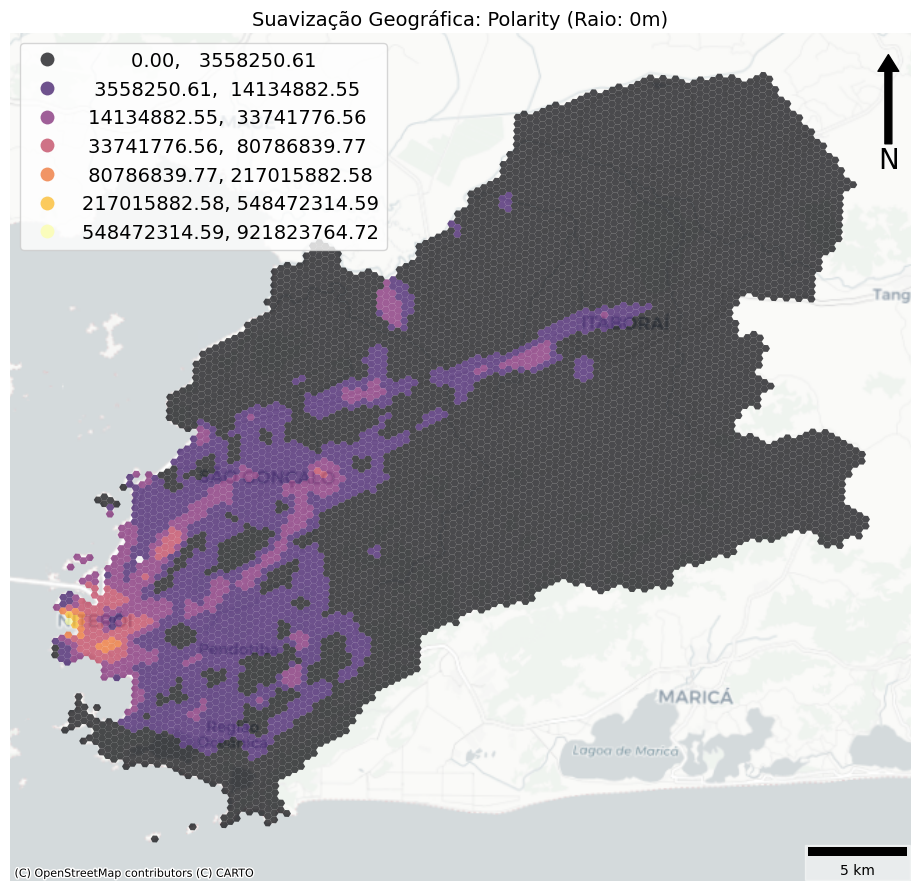

In [54]:
plot_geographical_smoothing(
    hex_gdf=foo,
    metric="polarity",
    radius=0,
    scheme="headtailbreaks",
    cmap="inferno",
    dpi=600,
    #output_file="geographical_smoothing_map.png",
)

plt.show()

# Exercício

**Objetivo:**  
Explorar a **estrutura topológica do espaço urbano** usando métricas da biblioteca GAUS para **avaliar padrões de acessibilidade, conectividade e centralidade espacial**, com foco em possíveis implicações para a **mobilidade urbana** e o **acesso equitativo a oportunidades**.

### Perguntas Norteadoras
Abaixo estão potenciais vias de investigação. Escolha aquela ou aquelas que soam mais interessantes para praticar o uso da biblioteca GAUS>

1. **Quais áreas são morfologicamente isoladas?**
   - Identifique regiões com **baixa `CONNECTIVITY` e baixo `REACH`**.
   - Há bairros com muitos nós (e.g. quarteirões, ruas), mas pouca conexão real?
   - Essas regiões coincidem com áreas periféricas ou mal atendidas por transporte público?

   > **Insight esperado**: Espaços com pouca conexão tendem a ter menor acessibilidade e mais dificuldade de integração funcional à cidade.

---

2. **Onde estão os corredores estruturantes da malha urbana?**
   - Identifique os segmentos ou entidades com **alto `BETWEENNESS` e `FREEMAN-KRAFTA CENTRALITY`**.
   - Essas áreas funcionam como **elos de ligação entre diferentes regiões**?
   - Essas vias coincidem com infraestrutura de transporte de massa (ex: corredores BRT, metrô, trem)?

   > **Insight esperado**: Essas métricas revelam os elementos **estrategicamente centrais** da cidade — importantes para priorização de investimentos.

---

3. **Como está a distribuição de oportunidades urbanas?**
   - Analise a métrica `OPPORTUNITY` para entender quais áreas (principalmente as de demanda) **têm maior acesso a pontos de interesse**.
   - Compare com áreas de baixa `ACCESSIBILITY`: há regiões com alta densidade, mas pouco acesso a serviços essenciais?
   - Use `CONVERGENCE` para identificar **quais pontos de oferta são de mais fácil acsso** pela estrutura morfológica existente.

   > **Insight esperado**: Desigualdades estruturais no acesso a oportunidades podem indicar necessidade de intervenções em infraestrutura ou redistribuição de serviços.

---

4. **Polos locais e periferias funcionais**
   - A métrica `POLARITY` pode ajudar a **identificar centros locais** (alto valor) e periferias funcionais (valores muito baixos).
   - Relacione `POLARITY` com `REACH`: áreas com muitos vizinhos, mas baixa polaridade, têm influência limitada?
   - Essas periferias funcionais coincidem com áreas de vulnerabilidade socioespacial?

   > **Insight esperado**: A análise pode revelar regiões que são **centralmente localizadas geograficamente**, mas **marginalizadas funcionalmente**.

---

### Ferramentas sugeridas:

- `geopandas` – para leitura e análise espacial.
- `networkx` – para inspeção adicional das redes se necessário.
- `matplotlib`, `seaborn` – para gráficos comparativos.
- `folium` ou `keplergl` – para visualização espacial interativa.

---

### Produto Possíveis:

- Mapas temáticos.
- Gráficos de dispersão/correlação cruzando métricas.
- Texto analítico respondendo às perguntas acima e discutindo **impactos para o transporte público**, **mobilidade ativa**, ou **desigualdade espacial**.

---

**Extra**: tente criar [clusters morfológicos](https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html#) com base nas métricas e verifique se eles correspondem às regiões administrativas, zonas urbanas ou planos diretores existentes.